In [4]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

x = 'a'

features = ['RMS', 'MAV', 'SSI', 'IEMG']

def extract_features_from_entry(values):
    return np.sqrt(np.mean(values**2)), np.mean(abs(values)), np.sum(values**2), np.sum(abs(values))

def get_feature_matrix():
    rows = []
    columns = []
    are_columns_obtained = False
    
    for filename in os.listdir('./entries'):
        values = pd.read_csv(f'./entries/{filename}').iloc[:,1:]
        
    
        label = int(filename[0])
        row = []
        for i in range(values.shape[1]):
            row += list(extract_features_from_entry(values.iloc[i])) 
        
        
        rows.append(row + [label])
        
        if not are_columns_obtained:
            are_columns_obtained = True
            num_of_sensors = values.shape[1]
            
            columns = [feature + '_' + str(sensor + 1) for feature in features for sensor in range(num_of_sensors)]    
            columns += ['Hand Gesture']

    return pd.DataFrame(rows, columns=columns)

feature_matrix = get_feature_matrix()

In [23]:
feature_matrix

,RMS_1,MAV_1,SSI_1,IEMG_1,Hand Gesture
0,72.0,72.0,5184,72,1
1,60.0,60.0,3600,60,2


In [24]:
feature_matrix

,RMS_1,MAV_1,SSI_1,IEMG_1,Hand Gesture
0,72.0,72.0,5184,72,1
1,60.0,60.0,3600,60,2


0


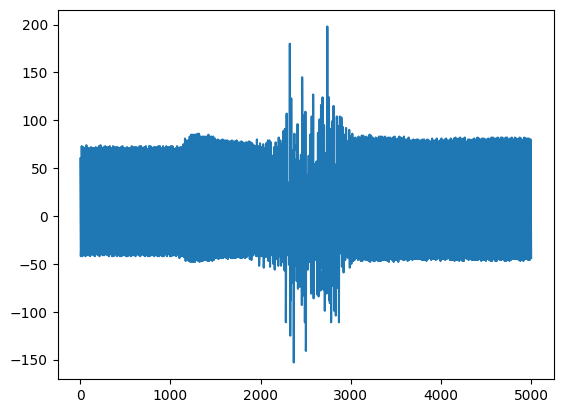

In [20]:
values = pd.read_csv('./entries/2_emg_1.csv').iloc[:,1:].values
wl = np.sum(np.abs(np.diff(values)))
print(wl)
plt.plot(values)